In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


## 予測値および正解データ

In [2]:
data = pd.read_csv("latest_res.csv")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,ans,path
0,10.521822,8.225686,-4.679379,-1.688010,5.077666,5.338162,5.018584,2.297355,-0.666441,0.059620,...,-1.523204,-1.723943,-3.120928,-2.294383,0.335583,-3.139532,-0.406685,-0.338417,0,./data/val/Abyssinian/Abyssinian_103.jpg
1,18.320728,7.108579,-4.133904,-2.512590,9.844345,5.528078,6.329694,-1.099435,1.311276,7.464173,...,-5.111322,-2.135532,-3.565389,-4.903441,6.168531,-3.213501,-2.451609,-4.903773,0,./data/val/Abyssinian/Abyssinian_122.jpg
2,8.607666,3.278524,-1.098888,-2.040442,2.264313,3.349947,3.384396,-1.312588,2.029162,2.623142,...,-1.028346,-2.280294,-0.996928,-2.151407,3.173999,-4.126343,-0.110734,0.335805,0,./data/val/Abyssinian/Abyssinian_133.jpg
3,6.074604,3.653524,-1.936424,-0.004226,2.715494,2.421817,1.640335,-0.997491,1.107400,4.313758,...,-1.200995,-1.196174,-0.961108,1.144779,-0.418346,-2.215108,0.869887,-0.973667,0,./data/val/Abyssinian/Abyssinian_158.jpg
4,12.391630,7.720151,-2.521335,-2.763378,-0.029752,1.543299,1.228431,-7.260143,-0.209844,1.964446,...,-3.787137,0.088776,-4.816122,-3.151484,6.231384,-1.864265,-1.797344,0.226771,0,./data/val/Abyssinian/Abyssinian_159.jpg


## 精度

In [11]:
data["pred_lab"] = data.iloc[:,:-2].values.argmax(axis=1)
(data.pred_lab == data.ans).mean()

0.8075880758807588

## 予測ラベルとクラス名対応表

In [4]:
lab_ref = pd.read_csv("lab_ref.csv")

In [5]:
lab_ref

,id,name
0,0,Abyssinian
1,1,Bengal
2,2,Birman
3,3,Bombay
4,4,British_Shorthair
5,5,Egyptian_Mau
6,6,Maine_Coon
7,7,Persian
8,8,Ragdoll
9,9,Russian_Blue


In [6]:
l = lab_ref.shape[0]

In [7]:
ans_cat = pd.Categorical(data.ans.values, categories=np.arange(l).astype(int))
pred_cat = pd.Categorical(data.iloc[:,:l].values.argmax(axis=1), categories=np.arange(l).astype(int))
conf_mat = pd.crosstab(pred_cat, ans_cat) # pred * ans

In [8]:
conf_mat

col_0,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
row_0,,,,,,,,,,,,,,,,,,,,,
0,15,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,17,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,17,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,2,0,0,0,1,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,18,0,...,0,0,0,0,0,0,0,0,0,0


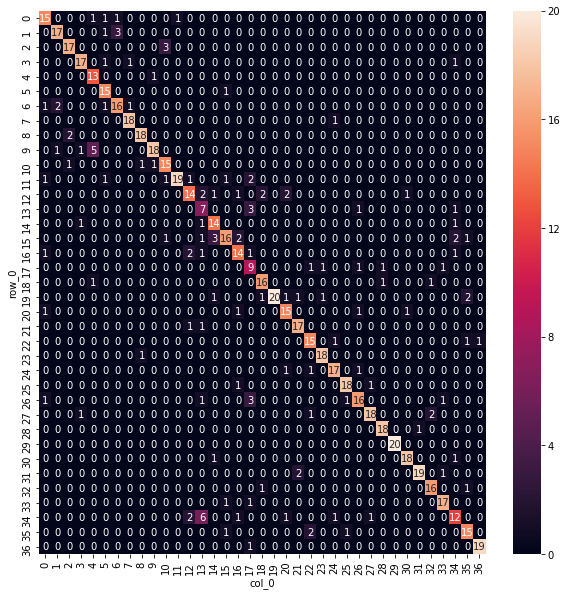

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt="d",ax=ax)